In [2]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import scvelo as scv

In [17]:
method = "velovae_std"
DATA_DIR = Path(f"{method}")

In [18]:
data_configs = {
    "04": ("data04", "uncertainty_data04.npy",   "umap_coords_data04.npy"),
    "11": ("data11", "uncertainty_data11_0.npy", "pca_coords_data11_0.npy"),
    "12": ("data12", "uncertainty_data12_0.npy", "pca_coords_data12_0.npy"),
}

datasets = {}
for key, (subdir, u_name, emb_name) in data_configs.items():
    datasets[key] = {
        "uncertainty": np.load(DATA_DIR / subdir / u_name),
        "embedding":   np.load(DATA_DIR / subdir / emb_name)
    }

all_uncertainties = [d["uncertainty"] for d in datasets.values()]
global_min = min(arr.min() for arr in all_uncertainties)
global_max = max(arr.max() for arr in all_uncertainties)
global_range = global_max - global_min

for key in datasets:
    raw_score = datasets[key]["uncertainty"]
    datasets[key]["scaled_uncertainty"] = (raw_score - global_min) / global_range

In [19]:
morandi_viridis_list = [
    "#F0E2A8",
    "#669A57",
    "#45707C",
    "#2B4C71",
    "#1E2A49"
]
cmap_custom = LinearSegmentedColormap.from_list("uncertainty_cmap", morandi_viridis_list, N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

Saved: ./velovae_std/04_embedding.png


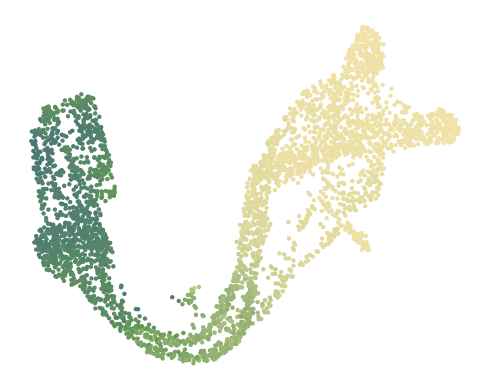

Saved: ./velovae_std/11_embedding.png


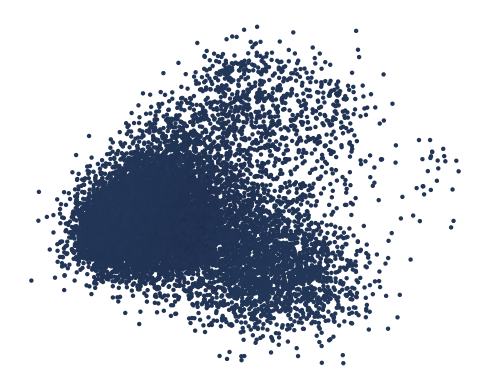

Saved: ./velovae_std/12_embedding.png


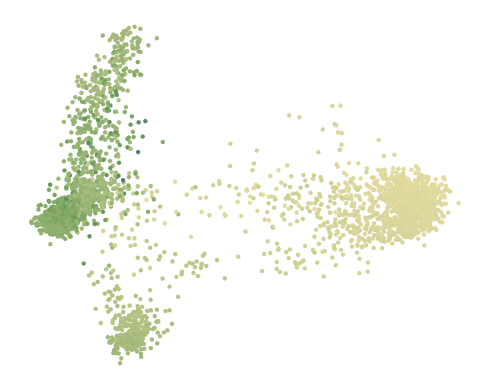

In [20]:
for key, data in datasets.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    
    x = data['embedding'][:, 0]
    y = data['embedding'][:, 1]
    color_val = data['scaled_uncertainty']
    
    sc = ax.scatter(
        x, y, 
        c=color_val,
        cmap=cmap_custom,
        norm=norm,
        s=10,
        linewidths=0,
    )

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()

    save_path = f"./{method}/{key}_embedding.png"
    fig.savefig(save_path, bbox_inches="tight", dpi=300, transparent=True)
    
    print(f"Saved: {save_path}")
    plt.show()
    plt.close(fig)

In [21]:
method = "cell2fate"
DATA_DIR = Path(f"{method}")

In [22]:
data_configs = {
    "04": ("data04", "uncertainty_data04.npy",   "umap_coords_data04.npy"),
    "11": ("data11", "uncertainty_data11_0.npy", "pca_coords_data11_0.npy"),
    "15": ("data15", "uncertainty_data15_0.npy", "pca_coords_data15_0.npy"),
}

datasets = {}
for key, (subdir, u_name, emb_name) in data_configs.items():
    datasets[key] = {
        "uncertainty": np.load(DATA_DIR / subdir / u_name),
        "embedding":   np.load(DATA_DIR / subdir / emb_name)
    }

all_uncertainties = [d["uncertainty"] for d in datasets.values()]
global_min = min(arr.min() for arr in all_uncertainties)
global_max = max(arr.max() for arr in all_uncertainties)
global_range = global_max - global_min

for key in datasets:
    raw_score = datasets[key]["uncertainty"]
    datasets[key]["scaled_uncertainty"] = (raw_score - global_min) / global_range

In [23]:
morandi_viridis_list = [
    "#F0E2A8",
    "#669A57",
    "#45707C",
    "#2B4C71",
    "#1E2A49"
]
cmap_custom = LinearSegmentedColormap.from_list("uncertainty_cmap", morandi_viridis_list, N=256)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

Saved: ./cell2fate/04_embedding.png


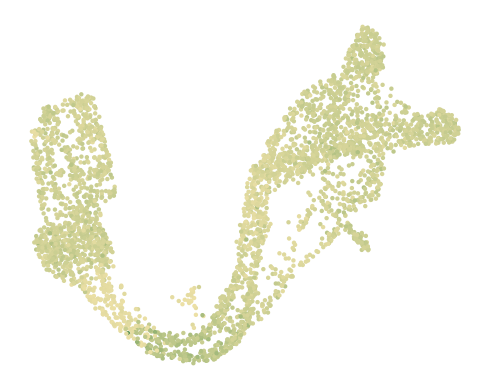

Saved: ./cell2fate/11_embedding.png


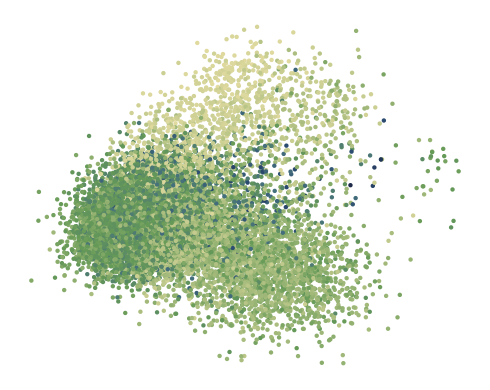

Saved: ./cell2fate/15_embedding.png


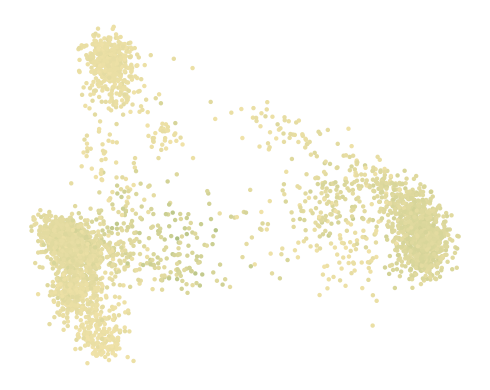

In [24]:
for key, data in datasets.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    
    x = data['embedding'][:, 0]
    y = data['embedding'][:, 1]
    color_val = data['scaled_uncertainty']
    
    sc = ax.scatter(
        x, y, 
        c=color_val,
        cmap=cmap_custom,
        norm=norm,
        s=10,
        linewidths=0,
    )

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()

    save_path = f"./{method}/{key}_embedding.png"
    fig.savefig(save_path, bbox_inches="tight", dpi=300, transparent=True)
    
    print(f"Saved: {save_path}")
    plt.show()
    plt.close(fig)